## Start up

In [45]:
import pandas as pd
import matplotlib.pyplot as mpl  
import matplotlib
import seaborn as sb
import numpy as np

## Load cleaned and transformed dinosaur data 

In [46]:
df = pd.read_csv('dino_data_cleaned.csv')

## Bar Chart: Dinosaur fossil counts per diet

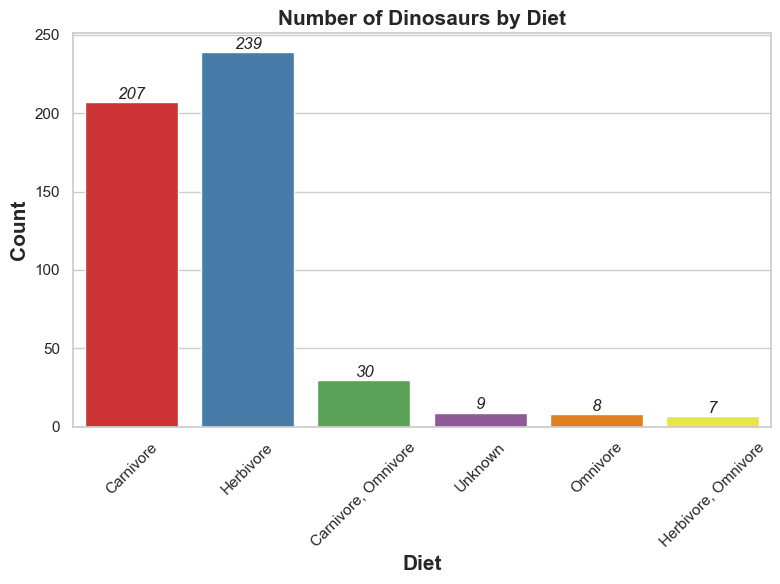

In [47]:
sb.set_theme(style="whitegrid")

mpl.figure(figsize=(8, 6))

# Countplot for Diet
axes = sb.countplot(
    data= df,              # Load the dataframe
    x= 'Diet',             # Column for the x-axis
    hue= 'Diet',           # Color per diet
    palette= 'Set1',       # Color choice for the bars
    dodge= False           # Wider bars
)

# Add counts on top of bars
for p in axes.patches:
    height = p.get_height()                # Get the bar height (count)
    axes.text(
        x= p.get_x() + p.get_width() / 2,  # Center above the bar
        y= height + 2,                     # Slightly above the bar
        s= f'{int(height)}',               # Show integer count
        ha= 'center',                      # Horizontal alignment         
        fontstyle= 'oblique'
    )

# Titles and labels
axes.set(title="Number of Dinosaurs by Diet",
       xlabel="Diet",
       ylabel="Count")

# Stylizing Titles and Labes
axes.set_title("Number of Dinosaurs by Diet", fontsize=15, fontstyle='normal', fontweight='bold')
axes.set_xlabel("Diet", fontsize=15, fontstyle='normal', fontweight='bold')
axes.set_ylabel("Count", fontsize=15, fontstyle='normal', fontweight='bold')

# Rotate x-axis labels for readability
axes.tick_params(axis='x', rotation=45)

mpl.tight_layout()
mpl.show()

## Horizontal Bar Chart: Dinosaur fossil counts per family

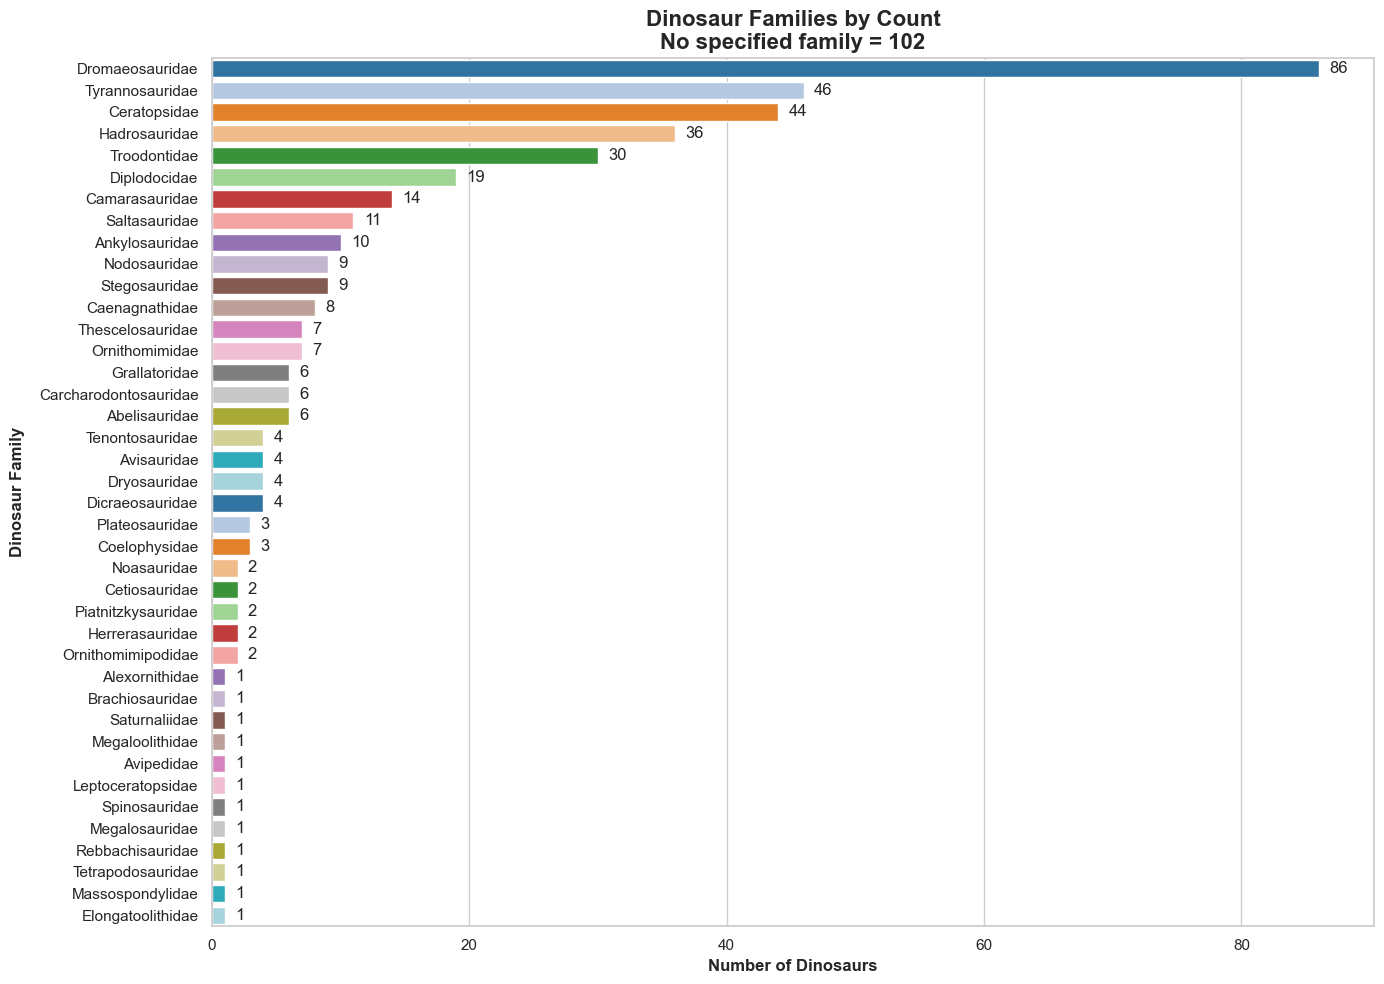

In [48]:
# Filter out 'No Family Specified'
df_family = df[df['Family'] != 'NO_FAMILY_SPECIFIED']
df_no_family = df[df['Family'] == 'NO_FAMILY_SPECIFIED']

# Count records labeled 'NO_FAMILY_SPECIFIED'
no_family_count = len(df_no_family)

# Calculate counts per family and convert series into a dataframe
dino_family_count = df_family['Family'].value_counts().reset_index()    # Turn series into a dataframe
dino_family_count.columns = ['Family', 'Count']                         # Rename columns

# Sort descending
family_sorted = dino_family_count.sort_values('Count', ascending=False)

# Set figure size
mpl.figure(figsize=(14, 10)) 

# Create horizontal bar plot 
axes = sb.barplot(
    data=family_sorted,             # Load family_sorted dataframe (sorted dino_family_count)
    x='Count',                      # x-axis: Count
    y='Family',                     # y-axis: Family
    hue='Family',                   # Color bars by Family
    dodge=False,
    legend=False,
    palette='tab20'                 # Color palette for bars
)

# Add count labels to the end of each bar
for i, row in family_sorted.iterrows():
    axes.text(row['Count'] + 0.8, i, f"{row['Count']}", va='center')

# Titles and labels
axes.set_title(f"Dinosaur Families by Count\nNo specified family = {no_family_count}", fontsize=16, fontweight='bold')
axes.set_xlabel("Number of Dinosaurs", fontweight='bold')
axes.set_ylabel("Dinosaur Family", fontsize=12, fontweight="bold", labelpad=10)

mpl.tight_layout()
mpl.show()


## Pivot Table: Dinosaur fossil counts per family by country (Americas)

In [49]:
# Map country code to their fll names
country_map = {
    'US': 'United States',
    'CA': 'Canada',
    'MX': 'Mexico',
    'AR': 'Argentina',
    'GL': 'Greenland',
    'BR': 'Brazil',
    'CO': 'Colombia'
}

# Count dinosaurs per Country Code and Family as a dataframe
country_family_counts = df.groupby(['Country Code', 'Family']).size().reset_index(name='Count')

# Map country codes to full names for this table only
country_family_counts['Country'] = country_family_counts['Country Code'].map(country_map)

# Pivot table
pivot_table = country_family_counts.pivot(
    index='Country',              # list country names as rows
    columns='Family',             # Different dino families as Columns
    values='Count'                # Number of counts per family
).fillna(0).astype(int)           # Replace missing values with 0 (change dtype from float to int)

# Add a 'Total' column per country
pivot_table['Total'] = pivot_table.sum(axis=1).astype(int)

# Show all columns
pd.set_option('display.max_columns', None)

pivot_table

Family,Abelisauridae,Alexornithidae,Ankylosauridae,Avipedidae,Avisauridae,Brachiosauridae,Caenagnathidae,Camarasauridae,Carcharodontosauridae,Ceratopsidae,Cetiosauridae,Coelophysidae,Dicraeosauridae,Diplodocidae,Dromaeosauridae,Dryosauridae,Elongatoolithidae,Grallatoridae,Hadrosauridae,Herrerasauridae,Leptoceratopsidae,Massospondylidae,Megaloolithidae,Megalosauridae,NO_FAMILY_SPECIFIED,Noasauridae,Nodosauridae,Ornithomimidae,Ornithomimipodidae,Piatnitzkysauridae,Plateosauridae,Rebbachisauridae,Saltasauridae,Saturnaliidae,Spinosauridae,Stegosauridae,Tenontosauridae,Tetrapodosauridae,Thescelosauridae,Troodontidae,Tyrannosauridae,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,5,0,0,0,1,0,0,0,3,0,2,0,1,0,0,0,0,0,2,2,0,0,1,0,17,2,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,40
Brazil,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,4
Canada,0,0,4,1,0,0,8,0,0,18,0,0,0,0,52,0,1,0,12,0,0,0,0,0,10,0,0,3,1,0,0,0,0,0,0,0,0,1,0,21,17,149
Colombia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Greenland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
Mexico,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
United States,0,0,6,0,3,1,0,14,3,26,0,3,3,19,34,4,0,6,21,0,1,1,0,1,74,0,9,4,1,0,0,0,10,0,0,9,4,0,7,9,29,302


## Scatter plot: Dinosaur Fossils per Collection Year (valid years only)

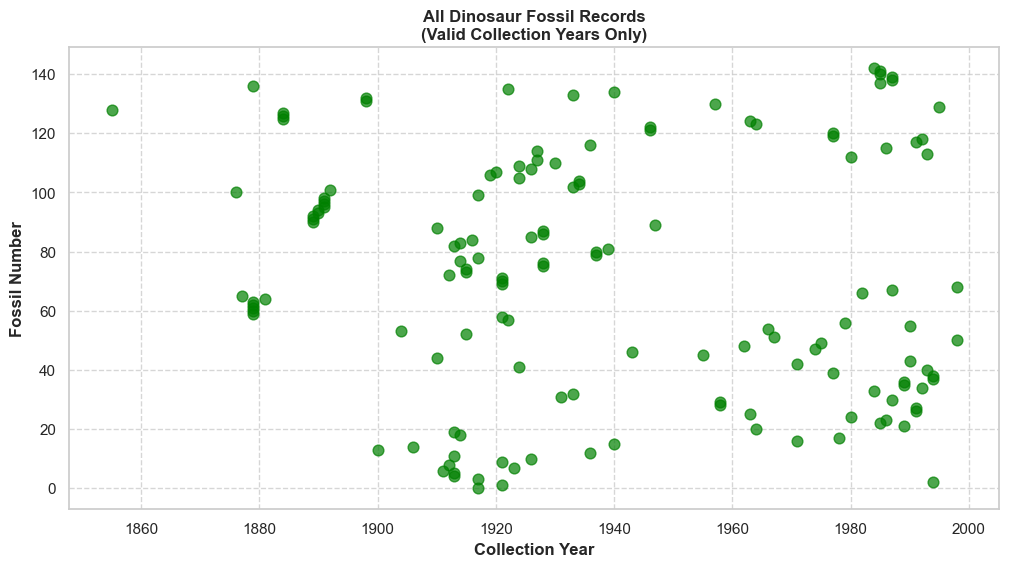

In [80]:
df_year = df.dropna(subset=['Collection Year']).copy()

# Scatter plot
mpl.figure(figsize=(12,6))
mpl.scatter(df_year['Collection Year'], range(len(df_year)), color='green', s=60, alpha=0.7)

mpl.xlabel("Collection Year", fontweight='bold')
mpl.ylabel("Fossil Number", fontweight='bold')
mpl.title("All Dinosaur Fossil Records\n(Valid Collection Years Only)", fontsize= 12, fontweight='bold')
mpl.grid(True, linestyle='--', alpha=0.8)
mpl.show()